In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec
import matplotlib
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools

Planet dictionary loaded:
OrderedDict([('b', {'P': 3.6539140592383017, 'limits_folded_x': [-0.25, 1.25], 'transit_folded': False, 'K_error_1sigma': 0.1367945398577967, 'K_error_2sigma': 0.31184284010979624, 'K_error_3sigma': 0.39378667710959336})])

GENERATING FULL RV TIME SERIES PLOT
Processing dataset: RVdata_expres


NameError: name 'default_color' is not defined

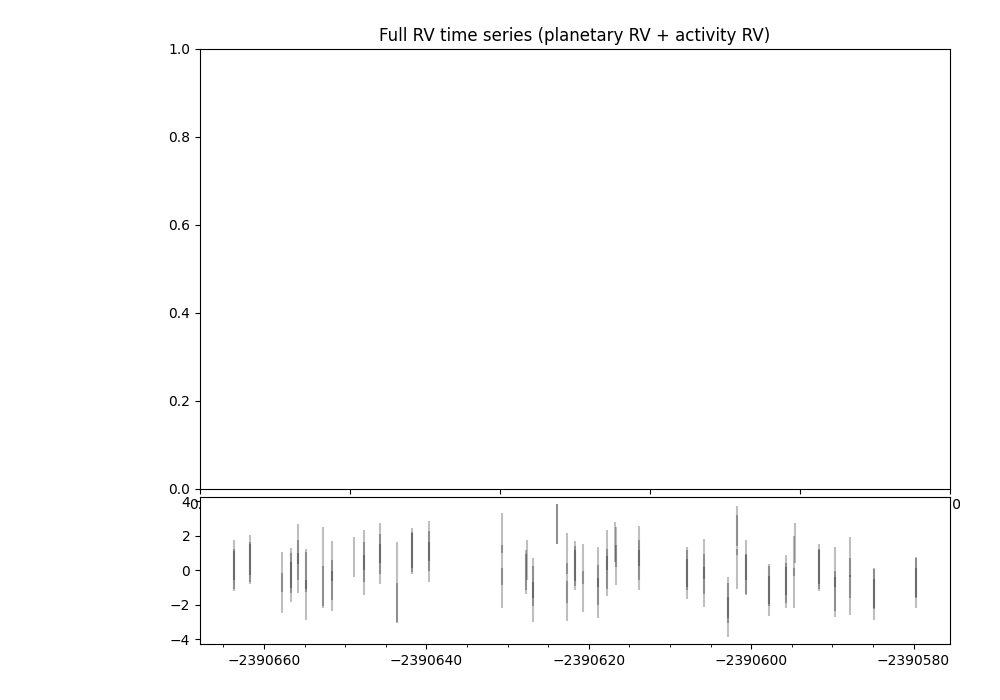

In [ ]:
# ============================================================================
# CONFIGURATION SECTION - CUSTOMIZE HERE
# ============================================================================


if 1: #Iara (multiple files ccf)
    dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/ESSP4/Results_combined/results_multiple_1022/DS2/DS2_2p/DS2_2p_ccfs/'
    dir_mods = 'DS2_2p_ccfs/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'DS2_2p_ccfs'

    datasets_list = ['RVdata_expres', 'RVdata_harps', 'RVdata_neid']
    datasets_labels = {'RVdata_expres':'EXPRES', 'RVdata_harps':'HARPS', 'RVdata_neid':'NEID'}

    activity_list = ['Contrastdata_expres', 'Contrastdata_harps', 'Contrastdata_neid', 'FWHMdata_expres', 'FWHMdata_harps', 'FWHMdata_neid']
    activity_labels = {'Contrastdata_expres':'EXPRES_Contrast', 'Contrastdata_harps':'HARPS_Contrast', 'Contrastdata_neid':'NEID_Contrast', 'FWHMdata_expres':'EXPRES_FWHM', 'FWHMdata_harps':'HARPS_FWHM', 'FWHMdata_neid':'NEID_FWHM'}

    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
    }


if 0: #Iara (multiple files)
    dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/ESSP4/Results_combined/results_multiple_1022/DS1/DS1_1p/DS1_1p_2_activity_indi/'
    dir_mods = 'DS1_1p_2_activity_indi/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'DS1_1p_2modes'

    datasets_list = ['RVdata_expres', 'RVdata_harps', 'RVdata_neid']
    datasets_labels = {'RVdata_expres':'EXPRES', 'RVdata_harps':'HARPS', 'RVdata_neid':'NEID'}

    activity_model = 'gp_multidimensional'

    activity_list = ['BISdata_expres', 'BISdata_harps', 'BISdata_neid', 'FWHMdata_expres', 'FWHMdata_harps', 'FWHMdata_neid']
    activity_labels = {'BISdata_expres':'EXPRES_BIS', 'BISdata_harps':'HARPS_BIS', 'BISdata_neid':'NEID_BIS', 'FWHMdata_expres':'EXPRES_FWHM', 'FWHMdata_harps':'HARPS_FWHM', 'FWHMdata_neid':'NEID_FWHM'}


    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
    }


if 0: #FIESTA
    # dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/ESSP4/results_fiesta_more_steps_1022/DS1/DS1_1p_2modes/'
    # dir_mods = 'DS1_1p_2modes/'
    # dir_plot = 'emcee_plot/model_files/'
    # filename = 'DS1_1p_2modes'

    dir_base = '/work2/lbuc/iara/GitHub/PyORBIT_examples/ESSP4/results_fiesta_more_steps_1022/DS2/DS2_1p_2modes/'
    dir_mods = 'DS2_1p_2modes/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'DS2_1p_2modes'

    datasets_list = ['RVdata_expres', 'RVdata_harps', 'RVdata_neid']
    datasets_labels = {'RVdata_expres':'EXPRES', 'RVdata_harps':'HARPS', 'RVdata_neid':'NEID'}

    activity_model = 'gp_multidimensional'

    activity_list = ['FIESTAdata_expres_mode1', 'FIESTAdata_expres_mode2', 'FIESTAdata_harps_mode1', 'FIESTAdata_harps_mode2', 'FIESTAdata_harpsn_mode1', 'FIESTAdata_harpsn_mode2', 'FIESTAdata_neid_mode1', 'FIESTAdata_neid_mode2']
    activity_labels = {'FIESTAdata_expres_mode1':'EXPRES_FIESTA1', 'FIESTAdata_expres_mode2':'EXPRES_FIESTA2', 'FIESTAdata_harps_mode1':'HARPS_FIESTA1', 'FIESTAdata_harps_mode2':'HARPS_FIESTA2', 'FIESTAdata_harpsn_mode1':'HARPSN_FIESTA1', 'FIESTAdata_harpsn_mode2':'HARPSN_FIESTA2', 'FIESTAdata_neid_mode1':'NEID_FIESTA1', 'FIESTAdata_neid_mode2':'NEID_FIESTA2'}


    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
    }


if 0: # Iara (single file)
    dir_base = '/work2/lbuc/jzhao/PyORBIT_ESSP/ESSP/iaras/DS1/DS1_3p/DS1_3p_2activity_indi/'
    dir_mods = 'DS1_3p_2activity_indi/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'iaras_DS1_3p_2activity_indi'

    datasets_list = ['RVdata']
    datasets_labels = {'RVdata': 'RV'}

    activity_model = 'gp_multidimensional'

    activity_list = ['BISdata', 'FWHMdata']
    activity_labels = {'BISdata':'BIS', 'FWHMdata':'FWHM'}

    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59329, 59433],
    }


if 0: # ESSP_gp_HARPSN_EXPRES_NEID_HARPS_poly_cpu
    dir_base = './'
    dir_mods = 'ESSP_gp_HARPSN_EXPRES_NEID_HARPS_poly_cpu/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'ESSP_gp_HARPSN_EXPRES_NEID_HARPS_poly_cpu'

    datasets_list = ['ESSP_HARPSN', 'ESSP_EXPRES', 'ESSP_NEID', 'ESSP_HARPS']
    datasets_labels = {'ESSP_HARPSN':'HARPSN', 'ESSP_EXPRES':'EXPRES', 'ESSP_NEID':'NEID', 'ESSP_HARPS':'HARPS'}

    activity_model = 'gp_multidimensional'

    activity_list = ['ESSP_BIS_HARPSN', 'ESSP_BIS_EXPRES', 'ESSP_BIS_NEID', 'ESSP_BIS_HARPS']
    activity_labels = {'ESSP_BIS_HARPSN':'BIS_HARPSN', 'ESSP_BIS_EXPRES':'BIS_EXPRES', 'ESSP_BIS_NEID':'BIS_NEID', 'ESSP_BIS_HARPS':'BIS_HARPS'}

    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59332, 59360],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [59332, 59360],
    }


if 0: # HD189567_3p_run7
    # Directory paths
    dir_base = './'
    dir_mods = 'HD189567_3p_run7/'
    dir_plot = 'emcee_plot/model_files/'
    filename = 'HD189567_3p_run7'

    # Dataset configuration
    datasets_list = ['RVdata']
    datasets_labels = {'RVdata':'RV'}

    # Activity model configuration
    activity_model = 'gp_multidimensional'
    activity_list = ['BISdata', 'FWHMdata']
    activity_labels = {
        'BISdata':'BIS',
        'FWHMdata':'FWHM',
    }

    # Plot limits for activity
    activity_dict = {
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [2455480., 2460211.522268],
        # 'limits_full_y': [-13.5, 13.5],
        # 'limits_residuals_y': [-11.5, 11.5],
    }

    # Plot limits for full RV model
    full_dict = {
        'reference_planet': 'b',
        'limits_full_x': [-0.25, 1.25],
        'limits_bjd': [2455480., 2460211.522268],
    }

# Planet configuration
# Set to True to enable planet c, False to disable
ENABLE_PLANET_C = False

# Plotting parameters
font_label = 12
dot_size = 18
figsize = (10, 7)

# ============================================================================
# END OF CONFIGURATION SECTION
# ============================================================================


# ============================================================================
# LOAD DATA AND SETUP PLANET DICTIONARY
# ============================================================================
summary_percentiles_parameters = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_parameters.p', 'rb')
)
summary_percentiles_derived = pickle.load(
    open(dir_base + dir_mods + 'emcee_plot/dictionaries/summary_percentiles_derived.p', 'rb')
)

planet_dict = collections.OrderedDict()

# Planet b configuration
planet_name = 'b'
planet_dict[planet_name] = {
    'P': summary_percentiles_parameters[planet_name]['P'][3],
    'limits_folded_x': [-0.25, 1.25],
    'transit_folded': False,
    'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] - 
                       summary_percentiles_parameters[planet_name]['K'][2]) / 2,
    'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] - 
                       summary_percentiles_parameters[planet_name]['K'][1]) / 2,
    'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] - 
                       summary_percentiles_parameters[planet_name]['K'][0]) / 2,
}

# Planet c configuration (optional)
if ENABLE_PLANET_C:
    planet_name = 'c'
    planet_dict[planet_name] = {
        'P': summary_percentiles_parameters[planet_name]['P'][3],
        'limits_folded_x': [-0.25, 1.25],
        'transit_folded': False,
        'K_error_1sigma': (summary_percentiles_parameters[planet_name]['K'][4] - 
                           summary_percentiles_parameters[planet_name]['K'][2]) / 2,
        'K_error_2sigma': (summary_percentiles_parameters[planet_name]['K'][5] - 
                           summary_percentiles_parameters[planet_name]['K'][1]) / 2,
        'K_error_3sigma': (summary_percentiles_parameters[planet_name]['K'][6] - 
                           summary_percentiles_parameters[planet_name]['K'][0]) / 2,
    }

print("Planet dictionary loaded:")
print(planet_dict)



# ============================================================================
# FULL RV TIME SERIES
# ============================================================================

key_name = full_dict['reference_planet']

for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")

    RV_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_radial_velocities_' + key_name + '.dat', 
        skip_header=1
    )

    error = np.sqrt(RV_mod[:, 9]**2 + RV_mod[:, 12]**2)

    time = RV_mod[:, 0]

    RV_CA = RV_mod[:, 7] - RV_mod[:, 5] # RV with RV acitvity and RV clean (RV_full_model - offset)



# ============================================================================
# ACTIVITY INDICATORS (COMBINED)
# ============================================================================


for n_dataset, dataset in enumerate(datasets_list):
    print(f"Processing dataset: {dataset}")
    default_color = 'C' + repr(n_dataset)

    # Plot model in dataset color
    activity_full = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '_full.dat', 
        skip_header=1
    )

    activity_mod = np.genfromtxt(
        dir_base + dir_mods + dir_plot + dataset + '_' + activity_model + '.dat', 
        skip_header=1
    )
    
    error = np.sqrt(activity_mod[:, 9]**2 + activity_mod[:, 12]**2)

    RV_activity = activity_full[:, 8]

    time = activity_full[:, 0]


RV_clean = RV_CA - RV_activity # RV clean ( RV_full_model - RV_activity - offset )






In [3]:
import pandas as pd
import numpy as np
import os
import glob

# Base directory
base_dir = "/work2/lbuc/iara/GitHub/PyORBIT_examples/ESSP4/results_multiple/DS1/DS1_1p/DS1_1p_2_activity_indi/DS1_1p_2_activity_indi/emcee_plot/model_files"

# Find all RV files that match the patterns
rv_pattern = os.path.join(base_dir, "RVdata_*_radial_velocities_b.dat")
gp_pattern = os.path.join(base_dir, "RVdata_*_gp_multidimensional.dat")

rv_files = glob.glob(rv_pattern)
gp_files = glob.glob(gp_pattern)

print(f"Found RV files: {len(rv_files)}")
print(f"Found GP files: {len(gp_files)}")

# Read and concatenate all files
all_data = []

for rv_file in rv_files:
    # Find corresponding GP file
    base_name = os.path.basename(rv_file).replace("_radial_velocities_b.dat", "_gp_multidimensional.dat")
    gp_file = os.path.join(base_dir, base_name)
    
    if not os.path.exists(gp_file):
        print(f"Warning: No corresponding GP file for {os.path.basename(rv_file)}")
        continue
    
    print(f"\nReading: {os.path.basename(rv_file)} + {os.path.basename(gp_file)}")
    
    # Read RV file
    df_rv = pd.read_csv(rv_file, sep='\s+', header=None, skiprows=1)
    
    # Read GP file
    df_gp = pd.read_csv(gp_file, sep='\s+', header=None, skiprows=1)
    
    print(f"  RV shape: {df_rv.shape}, GP shape: {df_gp.shape}")
    
    # Create dataframe with requested columns
    file_data = pd.DataFrame({
        'time': pd.to_numeric(df_rv.iloc[:, 0], errors='coerce'),
        'rv_corrected': pd.to_numeric(df_rv.iloc[:, 3], errors='coerce') - pd.to_numeric(df_rv.iloc[:, 5], errors='coerce'),
        'val_compare': pd.to_numeric(df_rv.iloc[:, 8], errors='coerce'),
        'RV_activity': pd.to_numeric(df_gp.iloc[:, 6], errors='coerce')
    })
    
    # Create RV_clean column
    file_data['RV_clean'] = file_data['rv_corrected'] - file_data['RV_activity']
    
    all_data.append(file_data)

# Concatenate all dataframes
df_combined = pd.concat(all_data, ignore_index=True)

print(f"\n=== COMBINED DATAFRAME ===")
print(f"Total rows: {len(df_combined)}")
print(df_combined.head())

# COMPARISON: RV_clean vs val_compare
print(f"\n{'='*50}")
print(f"COMPARISON 2: RV_clean vs val_compare")
print(f"{'='*50}")

rv_clean_clean = df_combined['RV_clean'].dropna()
val_compare_clean = df_combined['val_compare'].dropna()

print(f"RV_clean: {len(rv_clean_clean)} values")
print(f"val_compare: {len(val_compare_clean)} values")

if len(rv_clean_clean) == len(val_compare_clean):
    # Sort both arrays for comparison
    rv_clean_sorted = np.sort(rv_clean_clean.values)
    val_compare_sorted = np.sort(val_compare_clean.values)
    
    difference2 = rv_clean_sorted - val_compare_sorted
    
    print(f"\nFirst 10 differences: {difference2[:10]}")
    print(f"All differences are zero: {np.all(np.abs(difference2) < 1e-10)}")
    print(f"Max absolute difference: {np.max(np.abs(difference2)):.10f}")
    print(f"Min difference: {np.min(difference2):.10f}")
    print(f"Max difference: {np.max(difference2):.10f}")
    print(f"Mean absolute difference: {np.mean(np.abs(difference2)):.10f}")
else:
    print(f"Different lengths - cannot subtract directly")
    print(f"Difference in length: {len(rv_clean_clean) - len(val_compare_clean)}")





Found RV files: 3
Found GP files: 3

Reading: RVdata_harps_radial_velocities_b.dat + RVdata_harps_gp_multidimensional.dat
  RV shape: (107, 16), GP shape: (107, 16)

Reading: RVdata_neid_radial_velocities_b.dat + RVdata_neid_gp_multidimensional.dat
  RV shape: (84, 16), GP shape: (84, 16)

Reading: RVdata_expres_radial_velocities_b.dat + RVdata_expres_gp_multidimensional.dat
  RV shape: (96, 16), GP shape: (96, 16)

=== COMBINED DATAFRAME ===
Total rows: 287
           time  rv_corrected  val_compare  RV_activity  RV_clean
0  59337.993481     -1.783753    -2.006713     0.222960 -2.006713
1  59337.997242     -1.699753    -1.922339     0.222587 -1.922340
2  59338.004754      0.842247     0.620412     0.221835  0.620412
3  59340.849897     -1.483753    -1.119801    -0.363952 -1.119801
4  59340.853644     -0.612753    -0.248116    -0.364637 -0.248116

COMPARISON 2: RV_clean vs val_compare
RV_clean: 287 values
val_compare: 287 values

First 10 differences: [-8.88178420e-16 -9.99999999e-07 -

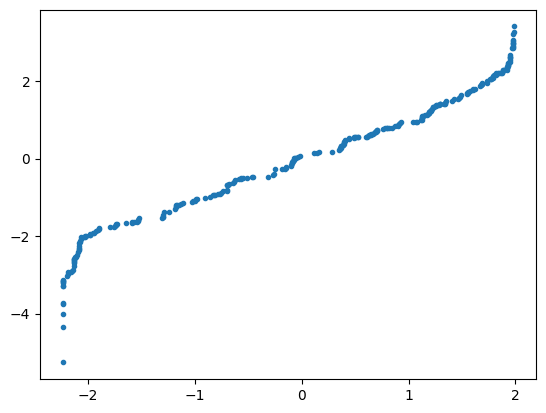

In [2]:
import matplotlib.pyplot as plt
plt.plot( rv_clean_sorted, val_compare_sorted, '.')